In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,precision_recall_curve, average_precision_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [2]:
# Load data set

mpshe = pd.read_excel('C:/Users/hocha/Documents/Portfolio Models/Churn_2/Kopano.xlsx')
mpshe.head()

,CustomerCode,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,818770008,38760,29070,Existing Customer,49,F,5,Graduate,Single,Less than R40K,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
1,713982108,12044,9033,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
2,709106358,1968,1476,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
3,710930508,5536,4152,Existing Customer,37,M,3,Uneducated,Single,R60K - R80K,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
4,710821833,5320,3990,Existing Customer,65,M,1,Unknown,Married,R40K - R60K,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174


**Observation**

**Customer Demographics**

- Age range: The sample shows customers aged from 37 to 65, suggesting a mature customer base.
- Gender distribution: Out of the 5 rows, 4 are male and 1 female. While not enough to conclude overall trends, the dataset likely has a male majority.
- Dependents: Most customers have 3 or more dependents, except one with only 1.

**Education & Marital Status**

- Education varies: “Graduate,” “Uneducated,” and “Unknown” appear. This suggests a mixed educational background.
- Marital status: Split between “Married” and “Single,” with no other categories in this snippet.

**Income**

-Income categories range from Less than R40K to R80K - R120K.
-This indicates a mix of lower to upper-middle income customers.

**Credit & Transactions**

- Credit Limit: Varies widely—from 3,418 to 22,352. Some customers have high credit limits but low utilization, suggesting varying credit usage behavior.
- Average Open to Buy: Shows the portion of available credit not yet used, varying widely (e.g., 3,418 vs 19,835).
- Revolving Balance & Utilization: Some customers carry revolving balances (e.g., 864, 2,517), while others have 0.
- Utilization ratios vary from 0.000 to 0.174, indicating some are using credit sparingly while others moderately.
- Total Transaction Amount & Count: High variation exists; some customers have many transactions (e.g., 33), others fewer (e.g., 20).

**Engagement / Inactivity**

- Months inactive in last 12 months: Mostly low (1–2 months), indicating fairly active customers.
- Contacts in last 12 months: Mostly 0–3, so customer engagement with the company is limited in some cases.

**Behavior & Changes**

- Total amount change Q4/Q1 & transaction count change Q4/Q1: Shows that some customers’ spending patterns fluctuate quarter to quarter. For example, row 0’s spending increased 1.541× from Q1 to Q4.

In [3]:
# Check information about variables

pd.set_option('display.float_format', lambda x: '%.2f' % x)
mpshe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerCode              9999 non-null   int64  
 1   Transaction_ID            9999 non-null   int64  
 2   Interactions_ID           9999 non-null   int64  
 3   Attrition_Flag            9999 non-null   object 
 4   Customer_Age              9999 non-null   int64  
 5   Gender                    9999 non-null   object 
 6   Dependent_count           9999 non-null   int64  
 7   Education_Level           9999 non-null   object 
 8   Marital_Status            9999 non-null   object 
 9   Income_Category           9999 non-null   object 
 10  Card_Category             9999 non-null   object 
 11  Months_on_book            9999 non-null   int64  
 12  Total_Relationship_Count  9999 non-null   int64  
 13  Months_Inactive_12_mon    9999 non-null   int64  
 14  Contacts

In [4]:
# Check type of data

mpshe.info()

# Check for missing values

print(mpshe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerCode              9999 non-null   int64  
 1   Transaction_ID            9999 non-null   int64  
 2   Interactions_ID           9999 non-null   int64  
 3   Attrition_Flag            9999 non-null   object 
 4   Customer_Age              9999 non-null   int64  
 5   Gender                    9999 non-null   object 
 6   Dependent_count           9999 non-null   int64  
 7   Education_Level           9999 non-null   object 
 8   Marital_Status            9999 non-null   object 
 9   Income_Category           9999 non-null   object 
 10  Card_Category             9999 non-null   object 
 11  Months_on_book            9999 non-null   int64  
 12  Total_Relationship_Count  9999 non-null   int64  
 13  Months_Inactive_12_mon    9999 non-null   int64  
 14  Contacts

**Observation**

- There are no missing values.

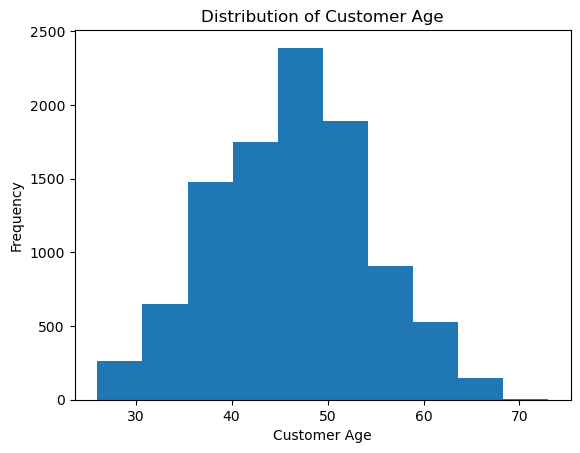

In [5]:
# Check distribution of Customer's Age

m1 = plt.hist(mpshe['Customer_Age'], bins = 10) 
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show() 

**Observation**

**Shape of the Distribution**

- The distribution is approximately bell-shaped (normal).
- This suggests that customer ages are fairly symmetrically distributed around a central value.

**Central Tendency**

- The peak (mode) is around 45–50 years.
- This indicates that the typical customer is in their mid-to-late 40s.

**Spread / Range**

- Ages range roughly from 25 to 70+ years.
- Most customers fall between 35 and 60 years, which is the densest region of the histogram.

**Skewness**

- The distribution looks slightly right-skewed:
     -There are fewer very young customers (<30).
     -A small tail extends into older ages (>65).

**Business Interpretation**

- The customer base is predominantly middle-aged.
- There are relatively few young customers, which may indicate:
    -The product appeals more to established working adults.
    -Potential growth opportunity in younger segments.

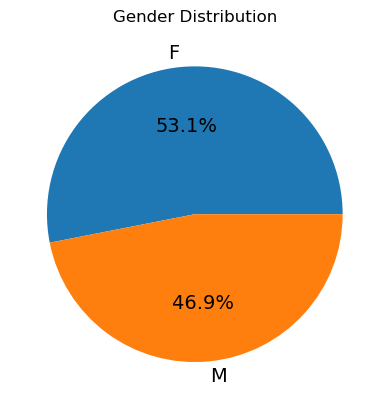

In [6]:
# Check distribution by Gender

counts = mpshe.groupby('Gender').size()

def autopct_func(pct):
    total = counts.sum()
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%'

counts.plot(
    kind = 'pie',
    autopct = autopct_func,
    textprops = {'fontsize': 14} )

plt.ylabel('')  
plt.title('Gender Distribution')
plt.show()


**Observation**

- The gender distribution is nearly balanced, with females representing 53.1% of customers and males 46.9%, indicating no significant gender skew in the     dataset.


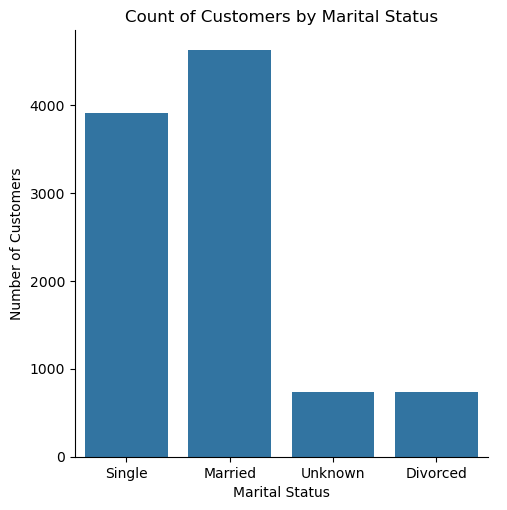

In [7]:
# Check distribution by Marital Status

sns.catplot(
    data = mpshe,
    x = 'Marital_Status',
    kind = 'count' )

plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Count of Customers by Marital Status')
plt.show()


**Observation**

- Married customers form the largest group (highest bar).
- Single customers are the second-largest group.
- Together, Single and Married account for the vast majority of the customer base.
- Divorced and Unknown categories are much smaller and roughly similar in size.
- Each of these groups represents only a small fraction of the total customers.

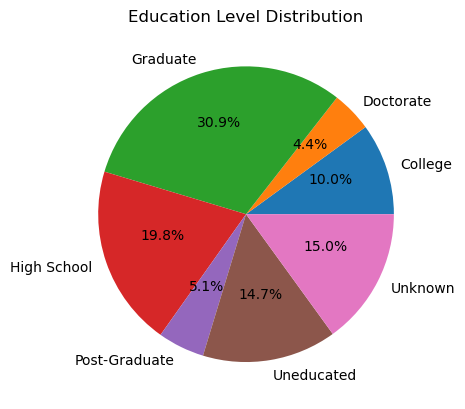

In [8]:
# Check distribution by Education Level

counts = mpshe.groupby('Education_Level').size()

def autopct_func(pct):
    total = counts.sum()
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n'

counts.plot(
    kind='pie',
    autopct=autopct_func,
    textprops={'fontsize': 10})

plt.ylabel('')
plt.title('Education Level Distribution')
plt.show()

**Observation**

- Dominant Group: Those with a Graduate level of education make up the largest segment of the population (nearly one-third at 30.9%).
- Higher Education vs. Basic Education: If we combine High School (19.8%) and Uneducated (14.7%), roughly 34.5% of the population has not pursued or completed higher education. Conversely, the combined group of those with College degrees or higher (Graduate, College, Post-Graduate, and Doctorate) accounts for 50.4%.
- Advanced Degrees are Rare: Doctorate (4.4%) and Post-Graduate (5.1%) holders represent the smallest portions of the chart, totaling less than 10% of the entire group.
- Significant Data Gap: A notable 15.0% of the data is categorized as "Unknown," which is larger than the "College," "Post-Graduate," or "Doctorate" segments individually. This could suggest a margin of error or missing information in the data collection process.

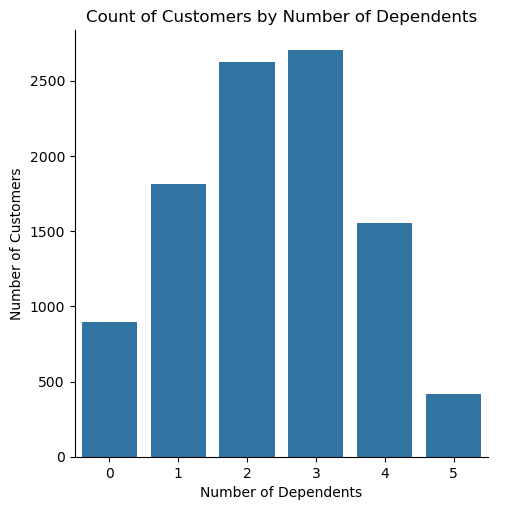

In [9]:
# Check distribution by Number of Dependents

sns.catplot( data = mpshe,
    x = 'Dependent_count',
    kind = 'count' )

plt.xlabel('Number of Dependents')
plt.ylabel('Number of Customers')
plt.title('Count of Customers by Number of Dependents')

plt.show()


**Observation**

- The most common number of dependents in this dataset is 3, followed very closely by 2. Together, these two categories represent the bulk of the
    surveyed population.
- The data follows a roughly normal (bell-shaped) distribution. The counts increase steadily from 0 to 3 dependents and then drop off significantly for
    4 and 5 dependents.
- Having 5 dependents is the least common scenario, appearing significantly less frequently than any other category.
- Because the peaks are at 2 and 3, the average (mean) number of dependents for this group likely falls somewhere between 2 and 3.

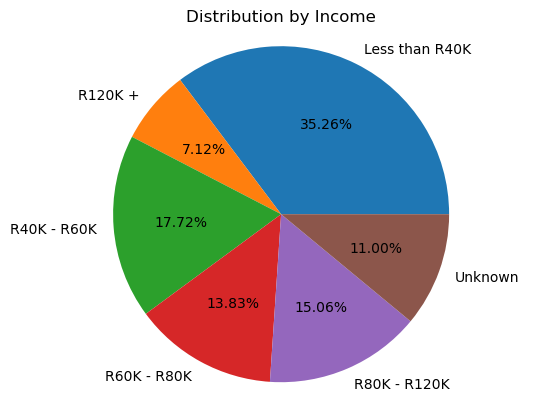

In [10]:
# Check distribution by Income per Category

mpshe.groupby('Income_Category').size().plot(
    kind = 'pie',
    autopct = '%.2f%%',
    title = 'Distribution by Income',
    textprops = {'fontsize': 10} )

plt.ylabel('')       
plt.axis('equal')   
plt.show()


**Observation**

- Low-Income Concentration: The largest single group consists of those earning less than R40K, making up over one-third of the total population.
- Middle to High Income: If you combine the brackets from R40K up to R120K, they represent roughly 46.6% of the population.
- High Earners: The smallest identified segment is the highest earners (R120K+), accounting for only 7.12% of the group.
- Data Quality: There is an 11% "Unknown" segment, which indicates that for about 1 in 10 people, income data was not captured or disclosed.


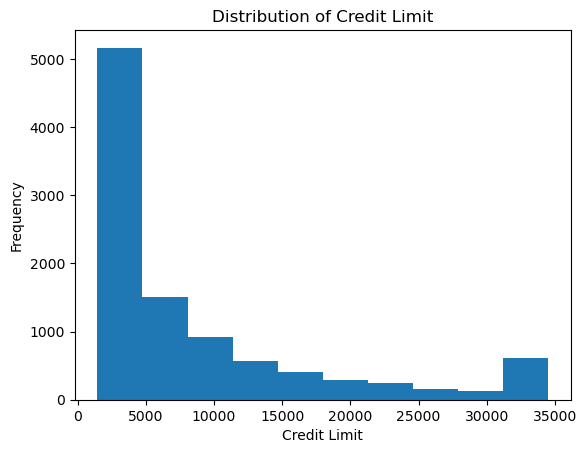

In [11]:
# Check distribution of Credit Limit

plt.hist(mpshe['Credit_Limit'], bins = 10)
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit')
plt.show()


**Observation**

- More than half of the population (approx. 53%) earns R60K or less. When combined with the high number of dependents (mostly 2–  3), this suggests a
    high "dependency ratio," where limited income must be spread across multiple household members.
- There is a massive concentration of individuals in the lowest credit limit bracket (over 5,000 people). As income increases or the credit limit
    reaches the maximum (near 35,000), the frequency drops significantly, though there is a small "bump" of individuals at the very highest credit tier.
- Both the income and dependent charts show a population of roughly 10,000 individuals, but the income chart notes that 11% of the data is "Unknown,"
    which may slightly obscure the true economic profile.


In [12]:
emu = mpshe[['Attrition_Flag','Customer_Age','Gender','Dependent_count','Education_Level',
             'Marital_Status','Income_Category','Card_Category','Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
             'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].copy()


In [13]:
emu1 = emu[['Customer_Age','Dependent_count','Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
             'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].copy()

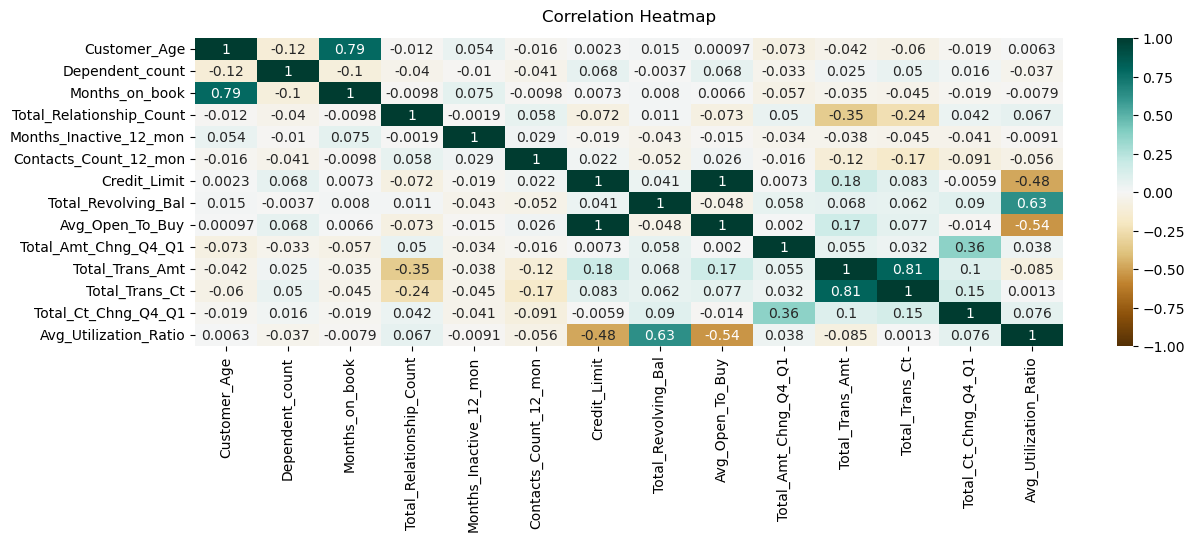

In [14]:
# Check the correlation between numerical variables

plt.figure(figsize = (14, 4))
heatmap = sns.heatmap(emu1.corr(), vmin = -1, vmax = 1, annot  = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12);
  

**Observation**

- The strongest correlation in the entire chart (likely 0.8 or higher) is between Total_Trans_Amt (Total Transaction Amount) and Total_Trans_Ct (Total
    Transaction Count). Customers who use their cards frequently (high count) also tend to spend more money in total (high amount). This suggests that
    high-value customers are generally those who use the card for many smaller or regular purchases rather than just a few large one-off items.
- There is a significant negative correlation between Credit_Limit and Avg_Utilization_Ratio. Customers with higher credit
    limits tend to have lower utilization ratios. This is a common pattern: as a bank increases a customer's limit, the percentage of that limit they
    actually use tends to drop unless their spending increases at the same rate.
- Relationship Between Age and Relationship Length Customer_Age shows a notable positive correlation with Months_on_book. Older customers have generally
    been with the bank for a longer period of time. This reflects customer loyalty and the fact that long-term banking relationships naturally mature as
    the client ages.
- The variable Dependent_count shows very light coloring (near 0) when compared to financial metrics like Credit_Limit or Total_Trans_Amt. In this
    specific dataset, the number of dependents a person has does not strongly predict how much they spend or what their credit limit will be.


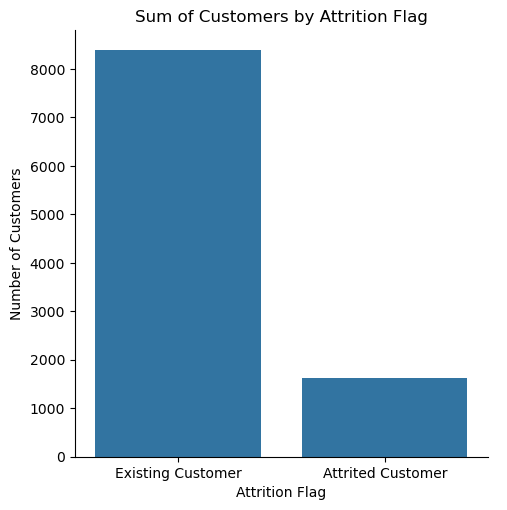

In [15]:
# Check a Attrition Flag

sns.catplot(
    data = emu,
    x = 'Attrition_Flag',
    kind = 'count' )

plt.xlabel('Attrition Flag')
plt.ylabel('Number of Customers')
plt.title('Sum of Customers by Attrition Flag')

plt.show()

**Observation**

- Existing Customers is the dominant group, with approximately 8,500 individuals. These are active clients who have remained with the service.
- Attrited Customers is significantly smaller, representing approximately 1,600 individuals who have left or closed their accounts.
- This means that there is class imbalance, thus a need to balance the classes.

In [16]:
# Selecting independent variables and response variable

X = emu.loc[:,['Customer_Age','Dependent_count','Months_on_book','Months_Inactive_12_mon','Credit_Limit',
               'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
               'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].values
y = emu.loc[:,'Attrition_Flag' ].values


In [17]:
# Split dataset into training and testing dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7499, 12) (2500, 12) (7499,) (2500,)


In [18]:
# Balance classes using SMOTE method

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [19]:
# Scale the dataset

scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)


Accuracy: 83.12%
Confusion Matrix:
 [[ 347   72]
 [ 350 1731]]

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.50      0.83      0.62       419
Existing Customer       0.96      0.83      0.89      2081

         accuracy                           0.83      2500
        macro avg       0.73      0.83      0.76      2500
     weighted avg       0.88      0.83      0.85      2500

Class order: ['Attrited Customer' 'Existing Customer']


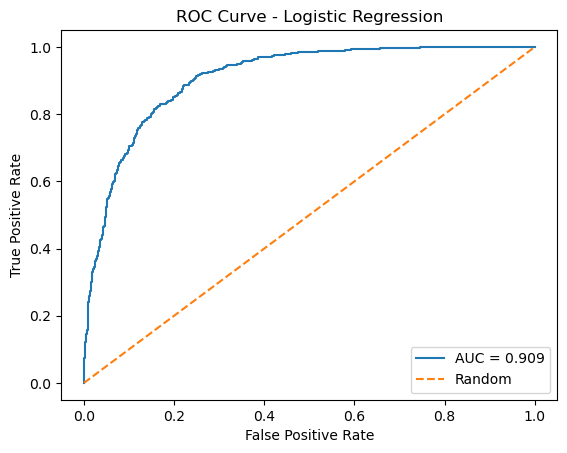

AUC: 0.9087998128309436


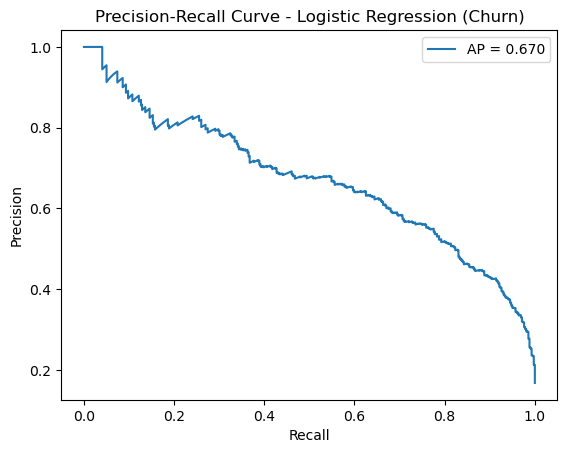

Average Precision (AP): 0.6698925413138098


In [20]:
# Implement Logistic Regression Classifier

lr = LogisticRegression()
lr.fit(X_res, y_res)


y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Check class order
print("Class order:", lr.classes_)

# Get index of the positive class (Attrited Customer)
pos_index = list(lr.classes_).index("Attrited Customer")

# Predicted probabilities for Attrited Customer
y_proba = lr.predict_proba(X_test)[:, pos_index]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label="Attrited Customer")
roc_auc = auc(fpr, tpr)
# Plot ROC curve (no colors specified)
plt.figure()
plt.plot(fpr, tpr, label = f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

print('AUC:', roc_auc)

# Probabilities already computed for Attrited Customer
# y_proba = lr.predict_proba(X_test)[:, pos_index]

precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba, pos_label = 'Attrited Customer')

ap = average_precision_score(y_test, y_proba, pos_label = 'Attrited Customer')

plt.figure()
plt.plot(recall, precision, label = f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Churn)')
plt.legend()
plt.show()

print('Average Precision (AP):', ap)


**Observation**

- Accuracy (83.12%) looks good, the report shows a major imbalance in how the model handles the two groups.

**Attrited Customers (The Minority Class)**

- Recall (0.83): This is the strongest metric here. It means the model found 83% of all people who actually left. It’s "sensitive" to churn.
- Precision (0.50): This shows the weakness of the model. When the model says a customer is leaving, it’s only right 50% of the time. It is "crying
                    wolf" quite often.
- F1-Score (0.62): This is the balance between Precision and Recall. For a minority class, 0.62 is "okay" but suggests room for improvement in filtering
                   out false alarms.

**Existing Customers (The Majority Class)**

- Precision (0.96): When the model says a customer will stay, it is almost always right.
- Recall (0.83): It only caught 83% of the stayers, because it accidentally moved many of them into the "Attrited" bucket (the 350 false positives).

**The AUC Score: Excellent Discriminatory Power**

- There is a 91% chance that the model will be able to distinguish between a randomly chosen customer who left and a
    randomly chosen customer who stayed.
- An AUC above 0.90 is generally considered excellent. It suggests that while your previous "Accuracy" might have been
   hampered by a specific threshold choice, the model itself has very strong underlying predictive power.
  
**The Curve Shape: Sensitivity vs. Specificity**

- The curve climbs very steeply toward the top-left corner. This is exactly what we want to see. It indicates that the
   model can achieve a high True Positive Rate (e.g., 0.80) while maintaining a relatively low False Positive Rate
    (around 0.15–0.20).
- The dashed diagonal line represents a model that guesses randomly (AUC = 0.50). Since your blue curve is far above
    this line, your model is performing significantly better than chance.

**Precision-Recall Curve (The Reality Check)**

 - While the ROC curve looks excellent, the PR curve is often more informative for imbalanced datasets (where you have
   many more stayers than leavers).
- Average Precision (AP = 0.670): This score (0.67) summarizes the model's ability to find churners while maintaining
   high precision. It is significantly better than a "no-skill" model, which would have an AP equal to the proportion
   of churners in your data (roughly 0.17 in your case).
- The Trade-off: You can see a sharp drop-off in precision as recall increases.
- If we want to catch 80% of churners (Recall = 0.8), your Precision drops to about 0.5. This matches your original
   classification report perfectly.
- If we need 80% Precision (so you aren't wasting money on loyal customers), you can only expect to catch about 25% of
   the churners.
  

['Attrited Customer' 'Existing Customer']
Accuracy: 96.76%
Confusion Matrix:
 [[ 371   48]
 [  33 2048]]

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.92      0.89      0.90       419
Existing Customer       0.98      0.98      0.98      2081

         accuracy                           0.97      2500
        macro avg       0.95      0.93      0.94      2500
     weighted avg       0.97      0.97      0.97      2500



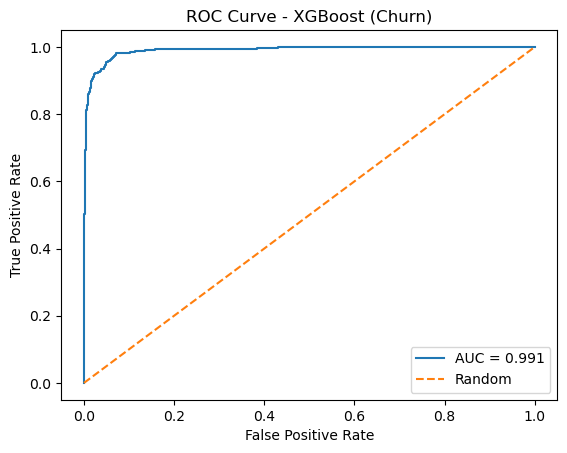

XGBoost AUC: 0.990693156287309


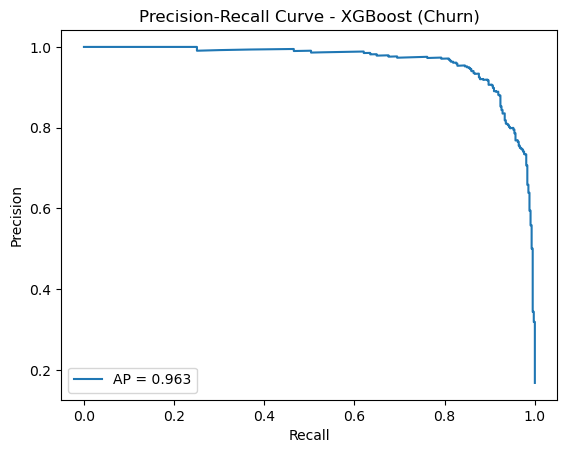

Average Precision (AP): 0.963477404566753


In [21]:
# XGBoost  Classification Implementation

le = LabelEncoder()

y_train_enc = le.fit_transform(y_res)
y_test_enc = le.transform(y_test)

print(le.classes_)


xgb = XGBClassifier(eval_metric = 'logloss', random_state = 42)

xgb.fit(X_res, y_train_enc)

# Predict on test set
y_pred_enc = xgb.predict(X_test)

# Decode predictions back to original labels (optional, for reporting)
y_pred = le.inverse_transform(y_pred_enc)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Output AUC-ROC curve
# Probabilities for Attrited Customer
attrited_index = list(le.classes_).index('Attrited Customer')
y_proba = xgb.predict_proba(X_test)[:, attrited_index]

# Binary ground truth (1 = Attrited)
y_test_binary = (y_test_enc == attrited_index).astype(int)

# Compute ROC and AUC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
roc_auc = roc_auc_score(y_test_binary, y_proba)

# Plot ROC curve (no colors specified)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Churn)')
plt.legend()
plt.show()


print('XGBoost AUC:', roc_auc)

# Output Precission-Recall curve
# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_proba)

# Average Precision score
ap = average_precision_score(y_test_binary, y_proba)

# Plot (no colors specified)
plt.figure()
plt.plot(recall, precision, label = f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost (Churn)')
plt.legend()
plt.show()

print('Average Precision (AP):', ap)


**Observation**

**The Confusion Matrix:**

 -  The model only flagged 33 loyal customers as leaving (down from 350 and 1,953 in previous runs).
 -  The still caught 371 out of 419 customers who were actually leaving.

**Attrited Customer (Churn)**

 - Precision (0.92): The model flags a customer as "Attrited," there is a 92% chance they are actually leaving. 
 - Recall (0.89): The model successfully identifying 89% of all customers at risk of leaving.
 - F1-Score (0.90): An F1-score of 0.90 for a minority class is excellent. It indicates the model has found a "sweet
    spot" where it is neither too aggressive nor too timid.

**Existing Customer (Stay)**

 - Precision & Recall (0.98): The model is nearly perfect at identifying and confirming your loyal customer base.

**ROC Curve XGBoost**

- Achieved an AUC of 0.991. This is a near-perfect score. The "elbow" of the curve is much tighter to the top-left
   corner, meaning XGBoost can identify almost all churners (High True Positive Rate) while making almost zero false
   accusations (Low False Positive Rate).

**XGBoost Precision-Recall (PR) Curve**

 - The "Plateau": Notice how the line stays almost perfectly flat at the top (1.0 Precision) until it hits about 0.8
     Recall.
 - This means that we can proactively reach out to 80% of your at-risk customers and be virtually 100% certain that
     every single one of them was actually going to leave.
 - The Drop-off: The model only begins to struggle (precision drops) when you try to catch that last 10-15% of
    churners. This suggests those final few individuals might be "random" leavers whose behavior doesn't follow
     standard patterns.
 


Accuracy: 91.72%
Confusion Matrix:
 [[ 368   51]
 [ 156 1925]]

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.70      0.88      0.78       419
Existing Customer       0.97      0.93      0.95      2081

         accuracy                           0.92      2500
        macro avg       0.84      0.90      0.86      2500
     weighted avg       0.93      0.92      0.92      2500

AUC: 0.96


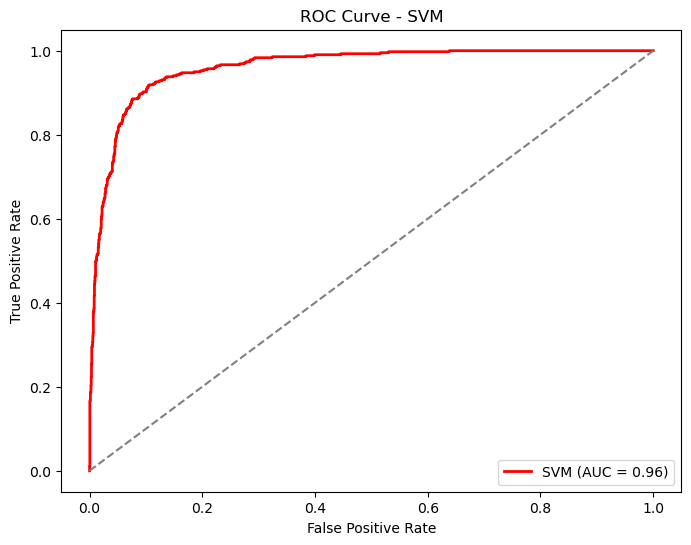

Average Precision (AP): 0.84


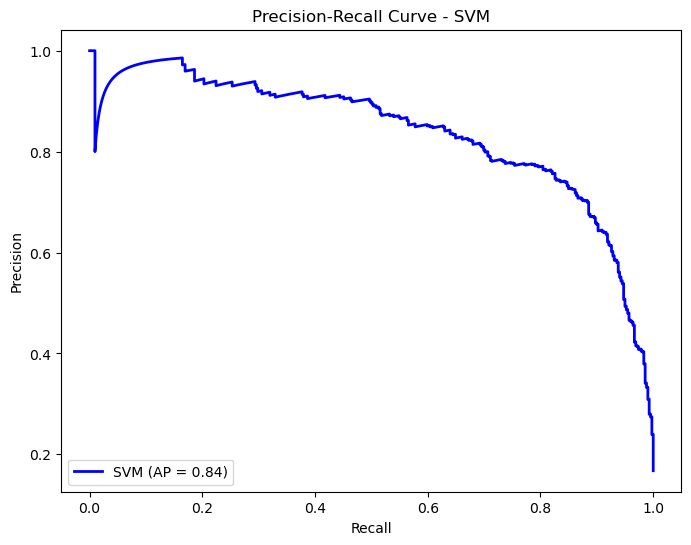

In [22]:
# SVM Classifier  Implementation

svm = SVC(kernel = 'rbf', probability = True, random_state = 42)  

# Fit the model on scaled data
svm.fit(X_res, y_res)

# Predict on scaled test set
y_pred = svm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot ROC-AUC curve
# Predicted probabilities for positive class

y_prob = svm.predict_proba(X_test)[:, 1]

# --- Positive class ---
positive_class = 'Attrited Customer'

# Get probabilities for positive class
# Find index of positive class in SVC classes
pos_index = list(svm.classes_).index(positive_class)
y_prob = svm.predict_proba(X_test)[:, pos_index]


# Convert y_test to binary (1 = positive_class, 0 = other)
y_test_binary = (y_test == positive_class).astype(int)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# AUC
auc_score = roc_auc_score(y_test_binary, y_prob)
print('AUC: {:.2f}'.format(auc_score))

# Plot
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'SVM (AUC = {:.2f})'.format(auc_score))
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc = 'lower right')
plt.show()

# --- Precision-Recall Curve ---
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_prob)
ap = average_precision_score(y_test_binary, y_prob)
print("Average Precision (AP): {:.2f}".format(ap))

plt.figure(figsize = (8,6))
plt.plot(recall, precision, color = 'blue', lw = 2, label = f'SVM (AP = {ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc = 'lower left')
plt.show()


**Observation**

**Confusion Matrix**

 - Success: SVM caught 88% of the customers who actually left (368 out of 419).
 - The Cost: SVM flagged 156 loyal customers as leaving. While this is a "false alarm," it is significantly better than
    the 350+ false alarms seen in your 83% accuracy model.
 - Accuracy (91.72%) : Is very high overall score, though in imbalanced datasets, we look closer at the individual
    classes.
 - AUC (0.96) This is excellent. A score of 0.96 means the model is very good at ranking customers by risk. It sits
     right between Logistic Regression (0.91) and your XGBoost (0.99).
 - Average Precision (0.84): This is a massive jump from your initial 0.67. It means the "quality" of our churn alerts
    is much higher; we aren't just guessing.
 - Recall (0.88): This is our "safety net." We are catching 88% of the people walking out the door.
 - Precision (0.70): This is our "efficiency." When the model flags a churner, it is right 7 out of 10 times.
 - F1-Score (0.78): This harmonic mean shows a much healthier balance than oour previous models.

**AUC-ROC Curve**

 - SVM Performance: The "High-Quality" Middle Ground
 - The SVM model shows a strong ability to separate customers who will leave from those who will stay.
 - ROC AUC (0.96): As seen in the red curve of your latest image, the SVM model is significantly more powerful than
    the original Logistic Regression (0.91) but slightly less precise than the XGBoost model (0.99).
 - Average Precision (0.84): This is a very healthy score. It suggests that the model is quite reliable at identifying
   "Attrited Customers" without generating an overwhelming number of false alarms.

**Precision-Recall Curve**

 - ROC Curve : The AUC of 0.96 shows excellent class separation. The red line stays very close to the top-
    left corner, indicating it can find most churners without many false alarms.
 - Precision-Recall Curve: The Average Precision (AP) of 0.84 is very strong. Notably, the curve stays above 0.80
    precision until recall reaches approximately 0.75.
 - We can catch 75% of all churners and maintain 80% accuracy in those specific predictions.
